In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import addBias
from helper import oneHotEncoder
from GDclassifier import GDclassifier
from PCA import PCA

%matplotlib inline

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw1train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw1dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw1eval_labels.txt', './data/')

# add bias as the first feature
trainFeature = addBias(trainFeature)
devFeature = addBias(devFeature)
evalFeature = addBias(evalFeature)

In [3]:
#########################################################
# Part 1: Convergence curve of four classifiers
print('*' * 40)
print('Part 1: Convergence curve of four classifiers')

****************************************
Part 1: Convergence curve of four classifiers


In [4]:
randomSeed = None
# Linear error
print('Linear Classifier')
linear = GDclassifier(loss='linear', learning_rate=0.01, iteration=500, 
                      C=None, CV=False, showFreq=0, randomSeed=randomSeed)
linear.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_linear, trainAcc_linear, w_linear = linear.getParams()
pcaMSE_linear, pcaAcc_linear, pcaW_linear = linear.getBest('Error')
print('\n')

Linear Classifier
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0796855000586  Highest Training Accuracy :  0.934807385457




In [5]:
randomSeed = 2012
# Logistic error
print('Logistic Classifier')
logistic = GDclassifier(loss='logistic', learning_rate=0.5, iteration=500, 
                        C=None, CV=False, showFreq=0, randomSeed=randomSeed)
logistic.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_logistic, trainAcc_logistic, w_logistic = logistic.getParams()
pcaMSE_logistic, pcaAcc_logistic, pcaW_logistic = logistic.getBest('Error')
print('\n')

Logistic Classifier
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0539621101345  Highest Training Accuracy :  0.936972874402




In [6]:
randomSeed = 2015
# Perceptron error
print('Perceptron Classifier')
perceptron = GDclassifier(loss='perceptron', learning_rate=0.05, iteration=500, 
                          C=None, CV=False, showFreq=0, randomSeed=randomSeed)
perceptron.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_perceptron, trainAcc_perceptron, w_perceptron = perceptron.getParams()
pcaMSE_perceptron, pcaAcc_perceptron, pcaW_perceptron = perceptron.getBest('Error')
print('\n')

Perceptron Classifier
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.0228963358055  Highest Training Accuracy :  0.918965124231




In [7]:
randomSeed = 2016
# SVM error
print('SVM classifier')
svm = GDclassifier(loss='svm', learning_rate=0.01, iteration=500, 
                   C=1, CV=False, showFreq=0, randomSeed=randomSeed)
svm.train(trainFeature, trainLabel, devFeature, devLabel, verbose=True)
trainMSE_svm, trainAcc_svm, w_svm = svm.getParams()
pcaMSE_svm, pcaAcc_svm, pcaW_svm = svm.getBest('Error')
print('\n')

SVM classifier
Reach the Maximum Iteration : 500th Iteration
Best Training Error:  0.214124231561  Highest Training Accuracy :  0.928994757237




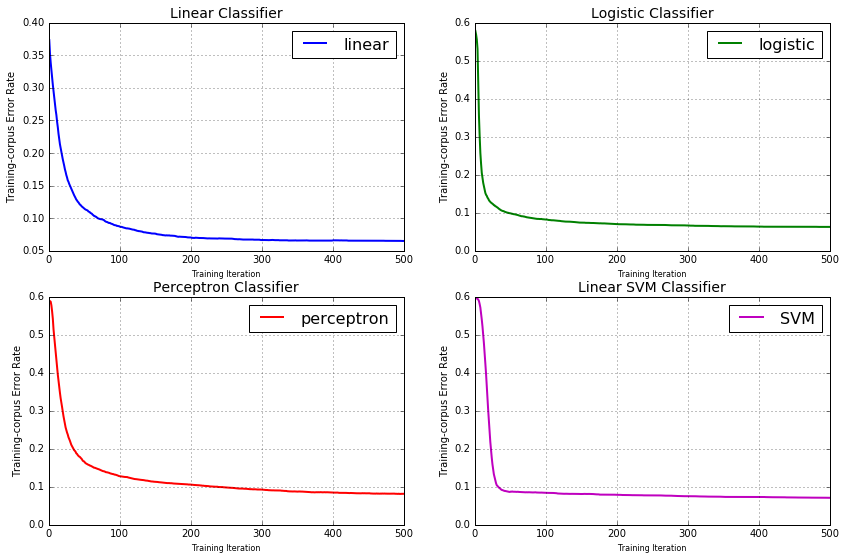

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
ax[0, 0].plot(range(1, len(trainAcc_linear) + 1),  1 - np.array(trainAcc_linear), 
              'b', linewidth=2, label='linear')
ax[0, 0].set_title('Linear Classifier', fontsize=14)
ax[0, 0].set_xlabel('Training Iteration', fontsize=8)
ax[0, 0].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[0, 0].legend(loc=1, fontsize=16)
ax[0, 0].grid('on')

ax[0, 1].plot(range(1, len(trainAcc_logistic) + 1), 1 - np.array(trainAcc_logistic), 
              'g', linewidth=2, label='logistic')
ax[0, 1].set_title('Logistic Classifier', fontsize=14)
ax[0, 1].set_xlabel('Training Iteration', fontsize=8)
ax[0, 1].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[0, 1].legend(loc=1, fontsize=16)
ax[0, 1].grid('on')

ax[1, 0].plot(range(1, len(trainAcc_perceptron) + 1), 1 - np.array(trainAcc_perceptron), 
              'r', linewidth=2, label='perceptron')
ax[1, 0].set_title('Perceptron Classifier', fontsize=14)
ax[1, 0].set_xlabel('Training Iteration', fontsize=8)
ax[1, 0].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[1, 0].legend(loc=1, fontsize=16)
ax[1, 0].grid('on')

ax[1, 1].plot(range(1, len(trainAcc_svm) + 1), 1 - np.array(trainAcc_svm), 
              'm', linewidth=2, label='SVM')
ax[1, 1].set_title('Linear SVM Classifier', fontsize=14)
ax[1, 1].set_xlabel('Training Iteration', fontsize=8)
ax[1, 1].set_ylabel('Training-corpus Error Rate', fontsize=10)
ax[1, 1].legend(loc=1, fontsize=16)
ax[1, 1].grid('on')

fig.savefig('./result/covergence.pdf')
plt.show()

In [9]:
#########################################################
# Part 2: Error curve for SVM
print('*' * 40)
print('Part 2: Error curve for SVM')

****************************************
Part 2: Error curve for SVM


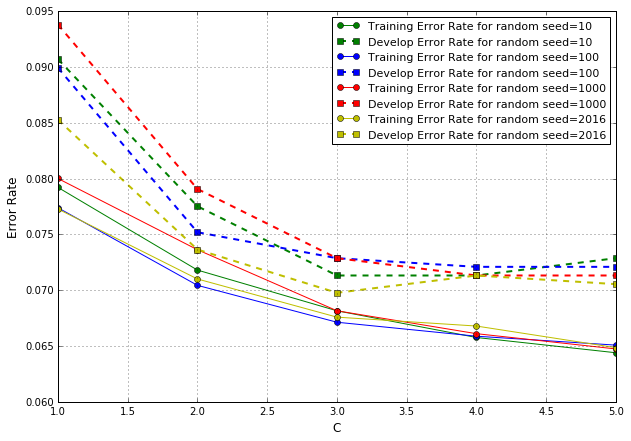

In [10]:
# Figure 2: Error curve for SVM
listSeed = [10, 100, 1000, 2016]
listC = [1.0, 2.0, 3.0, 4.0, 5.0]
learning_rate = 0.005
svm_train_Acc = []
svm_dev_Acc = []
for randomSeed in listSeed:
    for C in listC:
        svm = GDclassifier(loss='svm', learning_rate=learning_rate, iteration=500, 
                           C=C, CV=True, showFreq=0, randomSeed=randomSeed)
        svm.train(trainFeature, trainLabel, devFeature, devLabel, verbose=False)
        # find the best parameters
        bestMSE_svm, bestAcc_svm, bestW_svm = svm.getBest('Accuracy')
        devMSE, devAcc = svm.evaluate(devFeature, devLabel, bestW_svm)
        svm_train_Acc.append(bestAcc_svm)
        svm_dev_Acc.append(devAcc)
#         fig, ax = svm.plot(ylog=False, category='Error Rate', figsize=(12, 4))

fig, ax = plt.subplots(figsize=(10, 7))
color = ['g', 'b', 'r', 'y']
N = len(listC)
for i in range(4):
    ax.plot(listC, 1 - np.array(svm_train_Acc[i*N:(i+1)*N]), 'o-', color=color[i],
            markersize=6, linewidth=1, label='Training Error Rate for random seed=' + str(listSeed[i]))
    ax.plot(listC, 1 - np.array(svm_dev_Acc[i*N:(i+1)*N]), 's--', color=color[i],
            markersize=6, linewidth=2, label='Develop Error Rate for random seed=' + str(listSeed[i]))
# ax.set_title('Comparison of SVM Classifier with Different C', fontsize=14)
# ax.set_ylim((0.06, 0.085))
ax.set_xlabel('C', fontsize=12)
ax.set_ylabel('Error Rate', fontsize=12)
ax.legend(loc=1, fontsize=11)
ax.grid('on')

fig.savefig('./result/svm_comparison.pdf')
plt.show()

In [11]:
#########################################################
# Part 3: Comparison of testing error for 4 classifiers
print('*' * 40)
print('Part 3: Comparison of testing error for 4 classifiers')

****************************************
Part 3: Comparison of testing error for 4 classifiers


In [12]:
randomSeed = None
# Linear error
linear = GDclassifier(loss='linear', learning_rate=0.01, iteration=500, 
                      C=None, CV=True, showFreq=0, randomSeed=randomSeed)
linear.train(trainFeature, trainLabel, devFeature, devLabel, verbose=False)
# find the best parameters
bestMSE_linear, bestAcc_linear, bestW_linear = linear.getBest('Accuracy')
evalMSE_linear, evalAcc_linear = linear.evaluate(evalFeature, evalLabel, bestW_linear)
print("Test Error Rate for Linear Classifier: \t", 1 - evalAcc_linear)
print('\n')

Test Error Rate for Linear Classifier: 	 0.0314814814815




In [13]:
# Logistic error
randomSeed = 2012
logistic = GDclassifier(loss='logistic', learning_rate=0.5, iteration=500, 
                        C=None, CV=True, showFreq=0, randomSeed=randomSeed)
logistic.train(trainFeature, trainLabel, devFeature, devLabel, verbose=False)
# find the best parameters
bestMSE_logistic, bestAcc_logistic, bestW_logistic = logistic.getBest('Accuracy')
evalMSE_logistic, evalAcc_logistic = logistic.evaluate(evalFeature, evalLabel, bestW_logistic)
print("Test Error Rate for Logistic Classifier: \t", 1 - evalAcc_logistic)
print('\n')

Test Error Rate for Logistic Classifier: 	 0.0407407407407




In [14]:
# Perceptron error
randomSeed = 2015
perceptron = GDclassifier(loss='perceptron', learning_rate=0.05, iteration=500, 
                          C=None, CV=True, showFreq=0, randomSeed=randomSeed)
perceptron.train(trainFeature, trainLabel, devFeature, devLabel, verbose=False)
# find the best parameters
bestMSE_perceptron, bestAcc_perceptron, bestW_perceptron = perceptron.getBest('Accuracy')
evalMSE_perceptron, evalAcc_perceptron = perceptron.evaluate(evalFeature, evalLabel, bestW_perceptron)
print("Test Error Rate for Perceptron Classifier: \t", 1 - evalAcc_perceptron)
print('\n')

Test Error Rate for Perceptron Classifier: 	 0.0537037037037




In [15]:
# SVM error
randomSeed = 2016
svm = GDclassifier(loss='svm', learning_rate=0.05, iteration=500, 
                   C=1, CV=True, showFreq=0, randomSeed=randomSeed)
svm.train(trainFeature, trainLabel, devFeature, devLabel, verbose=False)
# find the best parameters
bestMSE_svm, bestAcc_svm, bestW_svm = svm.getBest('Accuracy')
evalMSE_svm, evalAcc_svm = svm.evaluate(evalFeature, evalLabel, bestW_svm)
print("Test Error Rate for Linear SVM Classifier: \t", 1 - evalAcc_svm)
print('\n')

Test Error Rate for Linear SVM Classifier: 	 0.0376543209877




In [16]:
#########################################################
# Part 4: PCA (in 17 dimensions)
print('*' * 40)
print('Part 4: PCA')

****************************************
Part 4: PCA


Keep the first 2 principal components


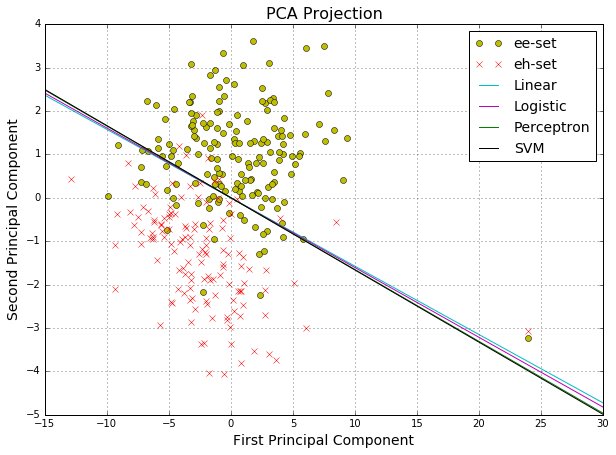

In [17]:
# define features for PCA analysis
pcaFeature = trainFeature
pcaLabel = trainLabel

# perform PCA decomposition
pca = PCA(n=2, whiten=False)
pca.fit(pcaFeature)
eigenvector, variance, mean = pca.getResult()

# project onto the first two principal components
projection = pca.transform(pcaFeature - mean)

# Randomly select 300 points from training set
np.random.seed(None)
index = np.random.choice(range(0, len(pcaFeature)), size=300, replace=False)

# select features and labels
selectedFeature = projection[index, :]
selectedLabel = pcaLabel[index, 0]

# define ee feature and eh feature
eeFeature = selectedFeature[selectedLabel == 0]
ehFeature = selectedFeature[selectedLabel == 1]

# transform the w onto PCA space
wLinear = pca.transform(pcaW_linear.T)[0, :]
wLogistic = pca.transform(pcaW_logistic.T)[0, :]
wPerceptron = pca.transform(pcaW_perceptron.T)[0, :]
wSvm = pca.transform(pcaW_svm.T)[0, :]

# calculate the boundary
x = np.linspace(-15, 30, 100)
yLinear = (- wLinear[0] * x) / wLinear[1]
yLogistic = (- wLogistic[0] * x) / wLogistic[1]
yPerceptron = (- wPerceptron[0] * x) / wPerceptron[1]
ySvm = (- wSvm[0] * x) / wSvm[1]

# plot the projection
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(eeFeature[:, 0], eeFeature[:, 1], 'yo', label='ee-set')
ax.plot(ehFeature[:, 0], ehFeature[:, 1], 'rx', label='eh-set')
ax.plot(x, yLinear, 'c-', label='Linear')
ax.plot(x, yLogistic, 'm-', label='Logistic')
ax.plot(x, yPerceptron, 'g-', label='Perceptron')
ax.plot(x, ySvm, 'k-', label='SVM')
ax.set_xlabel('First Principal Component', fontsize=14)
ax.set_ylabel('Second Principal Component', fontsize=14)
ax.set_title('PCA Projection', fontsize=16)
ax.legend(fontsize=14)
ax.grid('on')

fig.savefig('./result/PCA.pdf')
plt.show()

In [18]:
#########################################################
# Part 5: TensorFlow Analysis
print('*' * 40)
print('Part 5: TensorFlow Analysis')

****************************************
Part 5: TensorFlow Analysis


In [19]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw1train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw1dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw1eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel)
devLabel = oneHotEncoder(devLabel)
evalLabel = oneHotEncoder(evalLabel)

Tensor Flow Analysis
1000th Iteration, Training Error Rate: 	 0.0664463043213
1000th Iteration, Devalopment Error Rate: 	 0.0682170391083
1000th Iteration, Evaluation Error Rate: 	 0.0376543402672


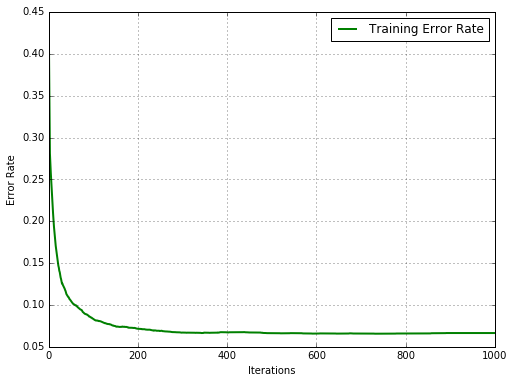

In [20]:
# begin the session
sess = tf.Session()

# Create the model
x = tf.placeholder(tf.float32, [None, 16])
W = tf.Variable(tf.random_normal([16, 2]))
b = tf.Variable(tf.random_normal([2]))
# W = tf.Variable(tf.zeros([16, 2]))
# b = tf.Variable(tf.zeros([2]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss
y_ = tf.placeholder(tf.float32, [None, 2])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Define optimizer
learning_rate = 0.15  # learning rate
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# Train
init = tf.initialize_all_variables()  # initialize the model
sess.run(init)

# Test trained model on training set
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# define accuracy variable to record the process
trainAcc = []
devAcc = []
evalAcc = []

max_iteration = 1000
for i in range(max_iteration):
    batch_xs, batch_ys = trainFeature, trainLabel
    sess.run(train_step, {x: batch_xs, y_: batch_ys})
    # keep recording the accuracy
    trainAcc.append(sess.run(accuracy, feed_dict={x: trainFeature, y_: trainLabel}))
    devAcc.append(sess.run(accuracy, feed_dict={x: devFeature, y_: devLabel}))
    evalAcc.append(sess.run(accuracy, feed_dict={x: evalFeature, y_: evalLabel}))

# Test trained model on evaluation set
print('Tensor Flow Analysis')
print(str(max_iteration) + "th Iteration, Training Error Rate: \t", 
      1 - sess.run(accuracy, feed_dict={x: trainFeature, y_:trainLabel}))
print(str(max_iteration) + "th Iteration, Devalopment Error Rate: \t", 
      1 - sess.run(accuracy, feed_dict={x: devFeature, y_:devLabel}))
print(str(max_iteration) + "th Iteration, Evaluation Error Rate: \t", 
      1 - sess.run(accuracy, feed_dict={x: evalFeature, y_: evalLabel}))

# close the session
sess.close()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_iteration + 1), 1 - np.array(trainAcc), 'g', linewidth=2, label='Training Error Rate')
# ax.plot(range(1, max_iteration + 1), 1 - np.array(devAcc), 'r', label='Development Error Rate')
# ax.plot(range(1, max_iteration + 1), 1 - np.array(evalAcc), 'b', label='Evaluation Error Rate')
ax.set_xlabel('Iterations', fontsize=10)
ax.set_ylabel('Error Rate', fontsize=10)
# ax.set_title('Convergence of Error Rate (TensorFlow)', fontsize=16)
ax.legend(loc=1, fontsize=12)
ax.grid('on')

fig.savefig('./result/tensorflow.pdf')
plt.show()